<a href="https://colab.research.google.com/github/ASHITHASB/math-question-bot/blob/main/Applied_Data_Science_with_Py_Ashitha_Assignment_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load the dataset
import pandas as pd
data = pd.read_csv('AusApparalSales4thQrt2020.csv')


In [2]:
#Check the structure of the dataset
data.head()


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [3]:
#Check for missing values
print(data.isna().sum())


Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


There are no missing values in the dataset, ensuring its readiness for further analysis.
No additional data imputation or removal is required.

In [4]:
#Importing libraries for Normalizing Data
from sklearn.preprocessing import MinMaxScaler


In [5]:
#Normalize numerical columns
scaler = MinMaxScaler()
data[['Unit', 'Sales']] = scaler.fit_transform(data[['Unit', 'Sales']])


In [6]:
#Verify normalized data
data.head()


,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,0.095238,0.095238
1,1-Oct-2020,Morning,WA,Men,0.095238,0.095238
2,1-Oct-2020,Morning,WA,Women,0.031746,0.031746
3,1-Oct-2020,Morning,WA,Seniors,0.206349,0.206349
4,1-Oct-2020,Afternoon,WA,Kids,0.015873,0.015873


The Unit and Sales columns have been normalized to bring their values into a range between 0 and 1.
This ensures uniformity in data, which is crucial for comparative analysis and visualization.
The first few rows (data.head()) confirm that both Unit and Sales are now in the normalized range.
For example, the first row for Kids (WA, Morning) shows normalized values for:
Unit: 0.095238
Sales: 0.095238

In [7]:
#Data Analysis
print(data[['Unit', 'Sales']].describe())


              Unit        Sales
count  7560.000000  7560.000000
mean      0.254054     0.254054
std       0.204784     0.204784
min       0.000000     0.000000
25%       0.095238     0.095238
50%       0.190476     0.190476
75%       0.380952     0.380952
max       1.000000     1.000000


Insights: The distribution of Unit and Sales values is slightly concentrated toward the lower range (0-0.25), as seen in the 25th percentile.
There is a gradual increase in Unit and Sales values from the lower quartile to the upper quartile, with fewer entries close to the maximum value (1).

In [8]:
grouped = data.groupby(['State', 'Group']).sum()
print(grouped)


                                                            Date  \
State Group                                                        
NSW   Kids     1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
      Men      1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
      Seniors  1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
      Women    1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
NT    Kids     1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
      Men      1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
      Seniors  1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
      Women    1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
QLD   Kids     1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
      Men      1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
      Seniors  1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
      Women    1-Oct-20201-Oct-20201-Oct-20202-Oct-20202-Oct-...   
SA    Kids     1-Oct-20201-Oct-20201-Oct-20202-O

**State-wise and Group-wise Sales:**

NSW (New South Wales) records the highest sales across all demographic groups:
Men: 112.21 (highest overall in NSW).
Women: 113.16.
Seniors: 106.90.
Kids: 109.44.
NT (Northern Territory) records the lowest sales:
Men: 28.01.
Seniors: 26.12 (lowest overall in NT).
Women: 27.31.
Kids: 27.61.
**Performance Trends:**

***Best-Performing Groups:***
In states like NSW and VIC, the highest contributors to sales are Men and Women.
Underperforming Groups:
Groups like Kids and Seniors underperform in smaller states like NT, TAS, and SA.
**Recommendations:**

Focus marketing and promotional efforts on underperforming states such as NT, TAS, and SA.
Introduce programs targeting Seniors and Kids in these states to boost sales.


**Appplication of Groupby() Function in this case:**
The groupby() function is a powerful tool for both data chunking and merging, enabling efficient aggregation and analysis of segmented data. It organizes sales data by state and demographic group, simplifying the identification of trends and outliers, such as underperforming states (e.g., NT) or groups (e.g., Seniors). This function is ideal for generating targeted reports and can also be used for merging with external datasets, like population or marketing spend, to provide deeper insights. For this analysis, it is recommended to first leverage groupby() for chunking to identify key trends, followed by merging with supplementary datasets to gain a comprehensive understanding of factors influencing sales

In [9]:
#Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt


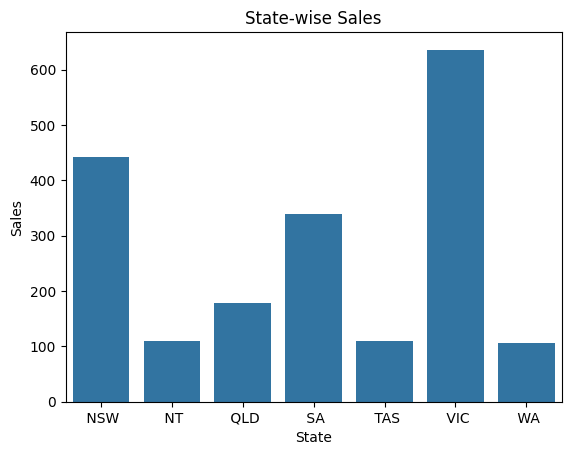

In [10]:
state_sales = data.groupby('State')['Sales'].sum().reset_index()
sns.barplot(x='State', y='Sales', data=state_sales)
plt.title('State-wise Sales')
plt.show()


Victoria (VIC) leads with the highest sales, followed by New South Wales (NSW), which also demonstrates strong performance. States such as South Australia (SA) and Queensland (QLD) show moderate sales, while Tasmania (TAS), Western Australia (WA), and Northern Territory (NT) lag significantly. This highlights VIC and NSW as key markets, whereas targeted sales strategies are needed for underperforming states like NT, WA, and TAS to drive growth.

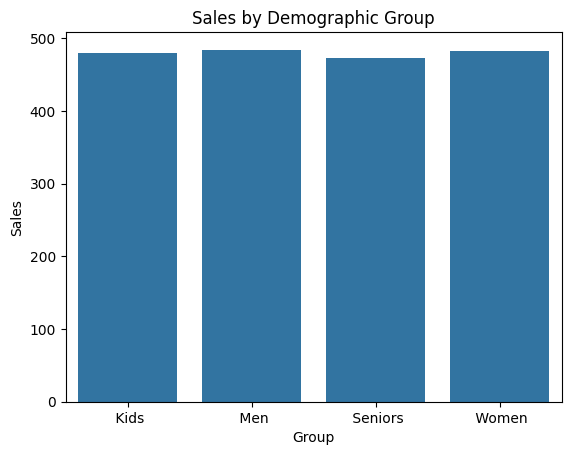

In [11]:
group_sales = data.groupby('Group')['Sales'].sum().reset_index()
sns.barplot(x='Group', y='Sales', data=group_sales)
plt.title('Sales by Demographic Group')
plt.show()


The sales for all groups—Kids, Men, Seniors, and Women—are fairly even, indicating balanced contributions across demographics. This suggests that no single group dominates sales, and marketing efforts should cater to all groups equally to maintain this balance. However, deeper analysis into regional performance or time-of-day trends might reveal nuanced differences within these demographics.

Based on the demographic sales chart

Group with the** Highest Sales: Men**

Group with the **Lowest Sales: Kids**

The differences are marginal, but Men slightly outperform other groups, while Kids contribute the least.

**Recommendations to Boost Sales**

The differences in sales performance between the Kids and Men demographics can be attributed to several factors. Men’s apparel likely benefits from a larger target audience, higher purchasing power, and more aggressive marketing strategies, whereas Kids’ sales are limited by parental decision-making and possibly less compelling promotions. Additionally, state-wise variations, such as lower sales in underperforming regions like NT or WA, and time-of-day shopping trends might further impact Kids’ sales. To boost Kids’ sales, targeted promotions like bundle deals, discounts during back-to-school seasons, and partnerships with schools can be effective. Increasing visibility through focused advertising and introducing time-based offers or diversified product ranges could also help. Addressing these areas strategically can improve the Kids segment's performance.

In [13]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%b-%Y')


In [14]:
data['Week'] = data['Date'].dt.isocalendar().week
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter


In [15]:
weekly_report = data.groupby('Week').agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()
weekly_report.columns = ['Week', 'Total Sales', 'Total Units']


In [16]:
monthly_report = data.groupby('Month').agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()
monthly_report.columns = ['Month', 'Total Sales', 'Total Units']


In [17]:
quarterly_report = data.groupby('Quarter').agg({'Sales': 'sum', 'Unit': 'sum'}).reset_index()
quarterly_report.columns = ['Quarter', 'Total Sales', 'Total Units']


In [18]:
print("Weekly Report")
print(weekly_report)

print("\nMonthly Report")
print(monthly_report)

print("\nQuarterly Report")
print(quarterly_report)


Weekly Report
    Week  Total Sales  Total Units
0     40    84.857143    84.857143
1     41   152.777778   152.777778
2     42   150.476190   150.476190
3     43   151.587302   151.587302
4     44   122.460317   122.460317
5     45   113.809524   113.809524
6     46   115.761905   115.761905
7     47   115.380952   115.380952
8     48   117.698413   117.698413
9     49   169.412698   169.412698
10    50   181.492063   181.492063
11    51   182.317460   182.317460
12    52   183.047619   183.047619
13    53    79.571429    79.571429

Monthly Report
   Month  Total Sales  Total Units
0     10   645.650794   645.650794
1     11   495.761905   495.761905
2     12   779.238095   779.238095

Quarterly Report
   Quarter  Total Sales  Total Units
0        4  1920.650794  1920.650794


In [19]:
weekly_report.to_csv('weekly_report.csv', index=False)
monthly_report.to_csv('monthly_report.csv', index=False)
quarterly_report.to_csv('quarterly_report.csv', index=False)


In [20]:
from google.colab import files

files.download('weekly_report.csv')
files.download('monthly_report.csv')
files.download('quarterly_report.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


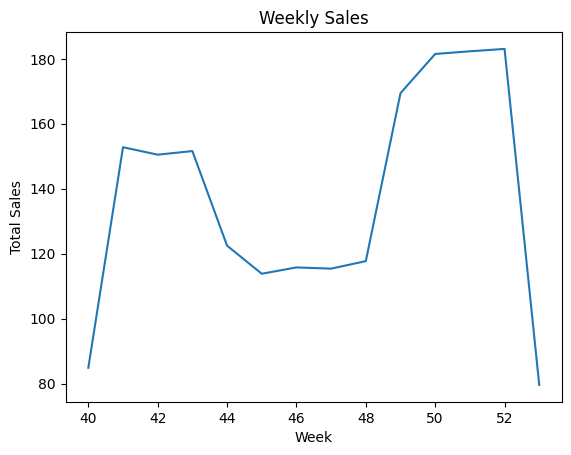

In [22]:
sns.lineplot(x='Week', y='Total Sales', data=weekly_report)
plt.title('Weekly Sales')
plt.show()


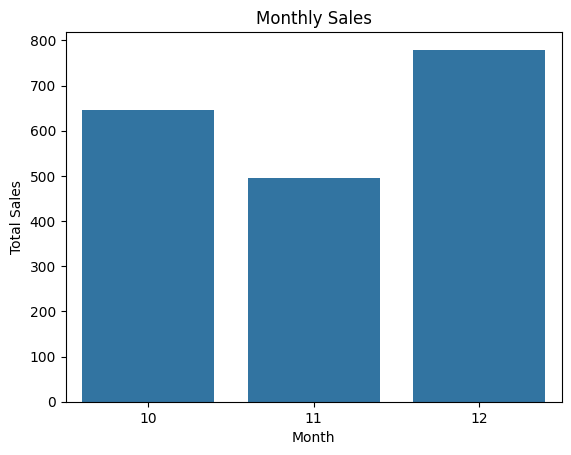

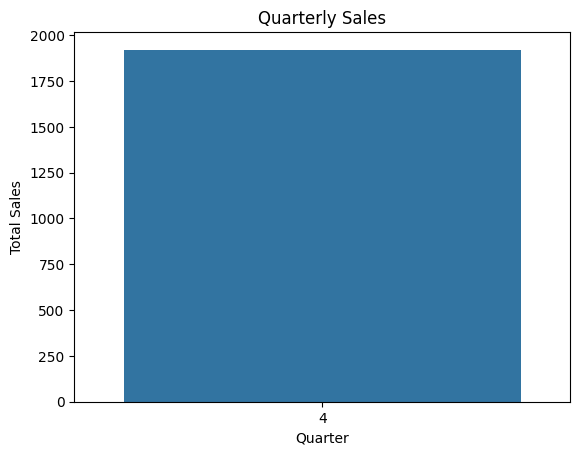

In [23]:
sns.barplot(x='Month', y='Total Sales', data=monthly_report)
plt.title('Monthly Sales')
plt.show()

sns.barplot(x='Quarter', y='Total Sales', data=quarterly_report)
plt.title('Quarterly Sales')
plt.show()


In [24]:
#Creating Dashboard
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


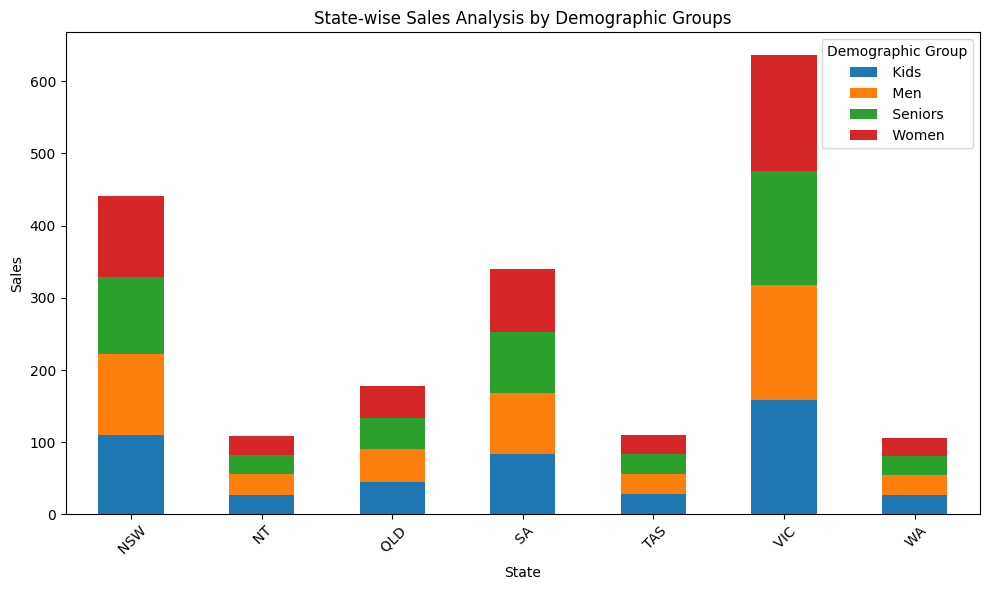

In [25]:
state_group_sales = data.groupby(['State', 'Group'])['Sales'].sum().unstack()

# Create a bar plot for state-wise sales analysis
state_group_sales.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.title('State-wise Sales Analysis by Demographic Groups')
plt.ylabel('Sales')
plt.xlabel('State')
plt.legend(title='Demographic Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


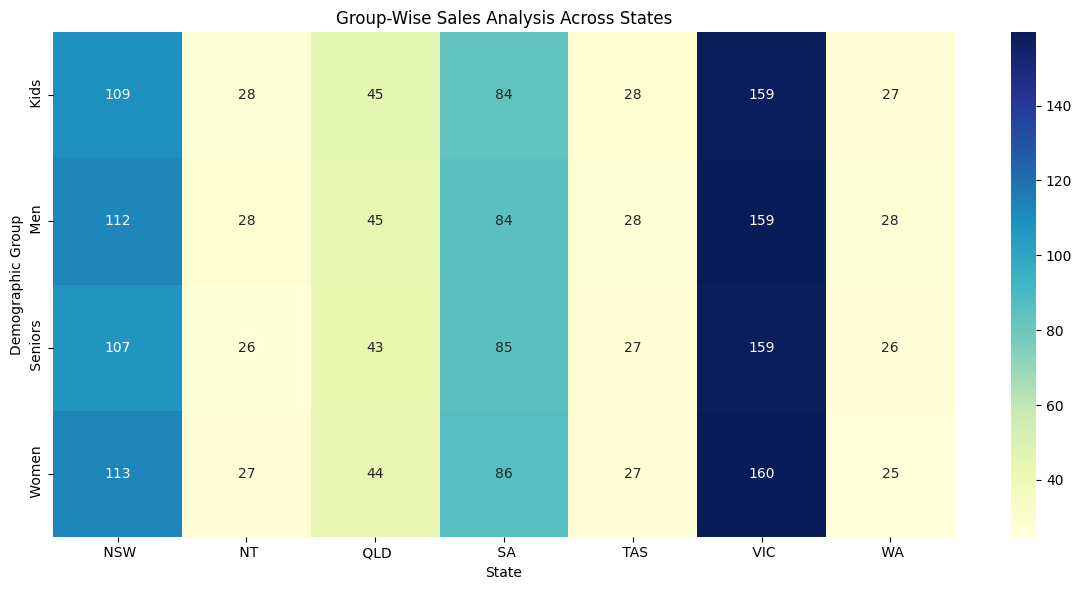

In [26]:
group_state_sales = data.groupby(['Group', 'State'])['Sales'].sum().unstack()

# Create a heatmap for group-wise sales analysis
plt.figure(figsize=(12, 6))
sns.heatmap(group_state_sales, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Group-Wise Sales Analysis Across States')
plt.ylabel('Demographic Group')
plt.xlabel('State')
plt.tight_layout()
plt.show()


<ipython-input-27-04494a0a4fb6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Time', y='Sales', data=time_sales, palette='coolwarm')


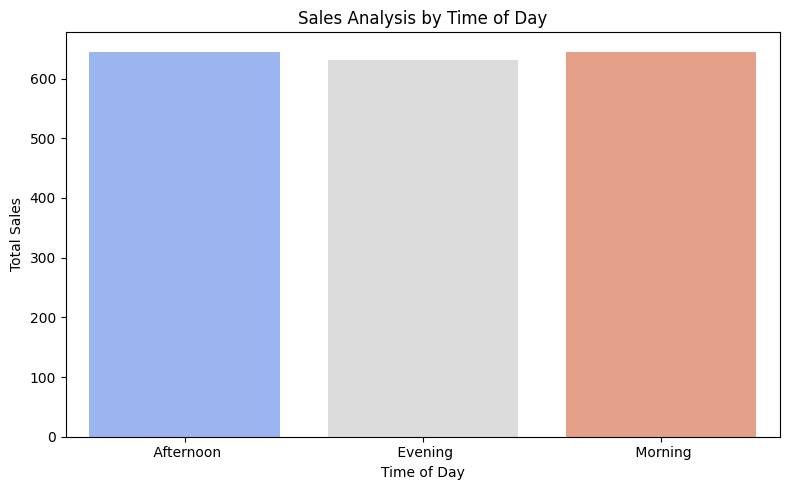

In [27]:
time_sales = data.groupby('Time')['Sales'].sum().reset_index()

# Create a bar plot for time-of-day sales analysis
plt.figure(figsize=(8, 5))
sns.barplot(x='Time', y='Sales', data=time_sales, palette='coolwarm')
plt.title('Sales Analysis by Time of Day')
plt.ylabel('Total Sales')
plt.xlabel('Time of Day')
plt.tight_layout()
plt.show()


In [28]:
import plotly.express as px

# State-wise sales by demographic groups
fig = px.bar(data, x='State', y='Sales', color='Group', title='State-Wise Sales by Demographic Groups')
fig.show()

# Time-of-day sales analysis
fig = px.pie(data, names='Time', values='Sales', title='Sales by Time of Day')
fig.show()


In [29]:
!pip install jupyter-dash


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 16.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3


In [30]:
# Interactive Dashboard
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H1("Sales Analysis Dashboard"),
    dcc.Graph(
        id='state-wise-sales',
        figure=px.bar(data, x='State', y='Sales', color='Group', title='State-Wise Sales by Demographic Groups')
    ),
    dcc.Graph(
        id='time-of-day-sales',
        figure=px.bar(data, x='Time', y='Sales', title='Sales by Time of Day')
    )
])

app.run_server(mode='inline')


<ipython-input-30-f5b8d8fb6a33>:3: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

<ipython-input-30-f5b8d8fb6a33>:4: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

/usr/local/lib/python3.10/dist-packages/dash/dash.py:579: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>